## Parameterization
There are 18 Calibrated Parameters in the model. Two of them are determined endogenously based on targets, but the rest all have to be defined.

For three of these (Debt target, government spending, and transfers), I base them off real values in the data.

#### Config

In [5]:
## load some packages
from pandas_datareader.fred import FredReader
import matplotlib.pyplot as plt

# start and end
start = '1966-01'
end = '2019-12'

#### Debt
In the model, $\overline{B}$ will be set to match the average debt-to-GDP ratio for the United States.

0.5773980210301073

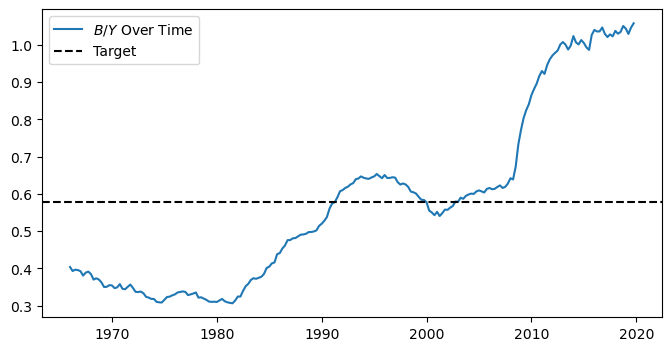

In [2]:
# data series
series = {
        'GDP': 'Y',  # gdp
        'GFDEBTN': 'B',  # debt
    }
df = (
        FredReader(series.keys(), start='1959-01')  # pull data 
            .read()  # read into a dataframe
            .rename(columns=series)  # rename to columns that make sense
            [start:end]  # slice to time we're intrested in
    )
df['B'] = df['B'] / 1000  # convert tio billions (from millions)
df['B/Y'] = df['B'] / df['Y']
B_target = df['B/Y'].mean()

# plot it
fig, ax = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(8)
ax.plot(df['B/Y'], label='$B/Y$ Over Time')
ax.axhline(B_target, ls='--', c='k', label='Target')
ax.legend()

# print target
B_target

#### Government Spending
$g$ in the model represents the fraction of output spent by the government.

0.20190358627827576

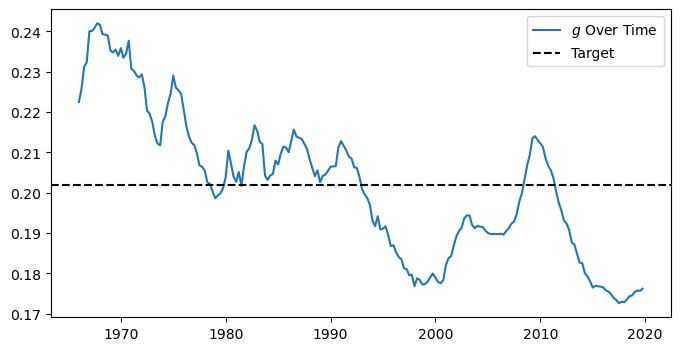

In [3]:
# data series
series = {
        'GDP': 'Y',  # gdp
        'GCE': 'G',  # government transfers
    }
df = (
        FredReader(series.keys(), start='1959-01')  # pull data 
            .read()  # read into a dataframe
            .rename(columns=series)  # rename to columns that make sense
            [start:end]  # slice to time we're intrested in
    )
df['g'] = df['G'] / df['Y']
g_target = df['g'].mean()

# plot it
fig, ax = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(8)
ax.plot(df['g'], label=r'$g$ Over Time')
ax.axhline(g_target, ls='--', c='k', label='Target')
ax.legend()

# print target
g_target

#### Transfers
In the model, $\eta$ represents government transfers to people. Therefore, I calibrate to the rate of social benefits programs from the government.

0.08109074274845375

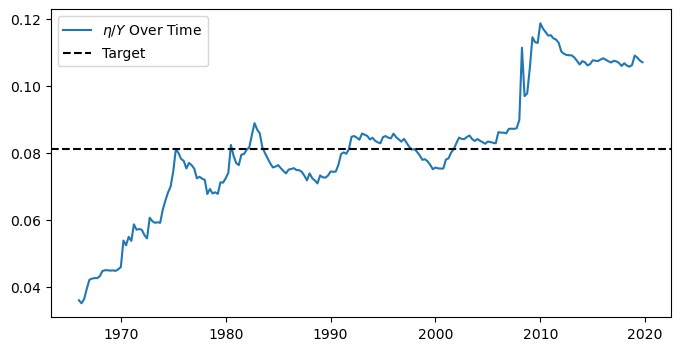

In [4]:
# data series
series = {
        'GDP': 'Y',  # gdp
        'B087RC1Q027SBEA': 'eta',  # government transfers
    }
df = (
        FredReader(series.keys(), start='1959-01')  # pull data 
            .read()  # read into a dataframe
            .rename(columns=series)  # rename to columns that make sense
            [start:end]  # slice to time we're intrested in
    )
df['eta/Y'] = df['eta'] / df['Y']
eta_target = df['eta/Y'].mean()

# plot it
fig, ax = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(8)
ax.plot(df['eta/Y'], label=r'$\eta/Y$ Over Time')
ax.axhline(eta_target, ls='--', c='k', label='Target')
ax.legend()

# print target
eta_target